<img src="./img/Logo.png" align="right" width="50%"></img>
# MissionAtlantic GeoNode Workshop
# How to use OGC webservices offered by the MissionAtlantic GeoNode in your data analysis

## 2. Visualize data using OGC Web Mapping Service (WMS)

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. We will be using this library throughout the tutorial to interact with the MissionAtlantic GeoNode OGC services.

The library is available from GitHub @  https://github.com/geopython/OWSLib

In [2]:
from owslib.wms import WebMapService

#### Create a WebMapService object

In [3]:
wms = WebMapService('https://geonode.missionatlantic.eu/geoserver/ows', version='1.3.0')
## Connecting to the MissionAtlantic Geonode

#### Find out what a WMS has to offer. Service metadata:

In [4]:
print(wms.identification.type)
print(wms.identification.version)
print(wms.identification.title)
print(wms.identification.abstract)

WMS
1.3.0
Mission Atlantic GeoNode WMS service
This is the WMS service of the Mission Atlantic GeoNode


#### Find out what layers are available

In [5]:
list(wms.contents)



['geonode:AAHA_Level1_allClasses',
 'geonode:AAHA_Level2_allClasses',
 'geonode:AAHA_Level3_allClasses',
 'geonode:AcaArc_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode',
 'geonode:Atl_Combine_ExtendedBG_WMS_YoolProd_TopoFromMOL_10km_WGS84_atlantic',
 'geonode:DisLop_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode',
 'geonode:Kstelliferun_density_clipped_GHO_reprojectedGeoNode',
 'geonode:LophReef_threhsolded_GHO_reprojectedGeoNode',
 'geonode:N1_p',
 'geonode:N3_n',
 'geonode:N5_s',
 'geonode:O2_o',
 'geonode:O3_TA',
 'geonode:O3_c',
 'geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode',
 'geonode:Ptot_Chl_result',
 'geonode:Ptot_Chl_result_depth_int',
 'geonode:Ptot_NPP_result',
 'geonode:Ptot_NPP_result_depth_int',
 'geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode',
 'geonode:Wind_Farms_EMODnet',
 'geonode:mldr10_1',
 'geonode:so_abs',
 'geonode:thetao_con',
 'geonode:uop_xenos_density']

#### Get the details of a layer (available layer metadata):

In [6]:
print(wms['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode'].title)
print(wms['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode'].keywords)


SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode
['SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode', 'WCS', 'GeoTIFF']


#### Get bounding boxes information in WGS84
Save as variable 'bbox1 & 2' and print to inspect

In [6]:
#Print the Bounding boxes of the desired layers

bbox1 = wms['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode'].boundingBoxWGS84
print(bbox1)

bbox2 = wms['geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode'].boundingBoxWGS84
print(bbox2)

(-34.670493943195595, 45.71717449496695, 14.199276906079788, 65.1152400730628)
(-22.520086150546295, 48.272387903546594, 6.909557994566022, 62.03426258864373)


#### Get available styles

In [7]:
wms['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode'].styles
wms['geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode'].styles


{'geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode': {'title': 'geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode',
  'legend': 'https://geonode.missionatlantic.eu/geoserver/ows?service=WMS&version=1.3.0&request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=geonode%3APherCarp_threhsolded_GHO_reprojectedGeoNode',
  'legend_width': '67',
  'legend_height': '152',
  'legend_format': 'image/png'}}

#### See available methods

In [8]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

#### Get available formats

In [9]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/pdf',
 'application/rss+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'application/x-gpkg',
 'application/x-sqlite3',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtype=openlayers3']

#### Get a map image and plot with matplotlib
Matplotlib allows for simple plotting of the dataset although, the library is not tailored specifically to plot geospatial. It is more commonly used for taking an initial glance at the data or in combination with other libraries such as Cartopy (see next step). 

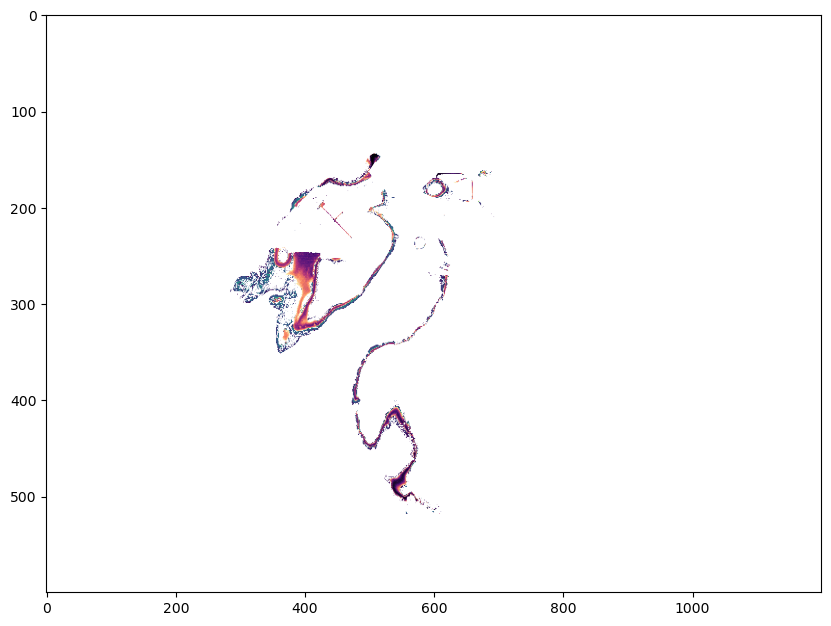

(-34.670493943195595, 45.71717449496695, 14.199276906079788, 65.1152400730628)


In [18]:

#Import necessary libraries for plotting
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Define the getMap function to retrieve the layer images from WMS
def getMap(layerNames,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=layerNames,
                 size=(1200,600),
                 srs='EPSG:4326',
                 bbox=bbox1,
                 format='image/png',
                 transparent=True)

def getFeatureInfo(layerNames,filename):
    wms.getOperationByName('GetFeatureInfo').formatOptions
    img = wms.getfeatureinfo(layers=layerNames,
                 format='image/png',
                 transparent=True)
    
# Write the image to a temporary file
    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()

# Define the layers to be used for the image, 
# here we use the modelled distributions of Syringammina and Pheronema Carpinteri datasets.
# In order to plot them on top of eachother on the same map
getMap(
    layerNames=['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode','geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode'],
    bbox=(bbox1),
    filename = ['data/Syringammina_and_PheronemaCarp_Distribution.png']
)
#read the image
image=mpimg.imread('data/Syringammina_and_PheronemaCarp_Distribution.png')

# plot the image for visualisation
fig1 = plt.figure(figsize=(10, 7.5))
plt.imshow(image,aspect='auto')
plt.show()
print(bbox1)

#### Use the WMS service directly in Cartopy

Image 1 saved as data/legend_image_1.png
Image 2 saved as data/legend_image_2.png


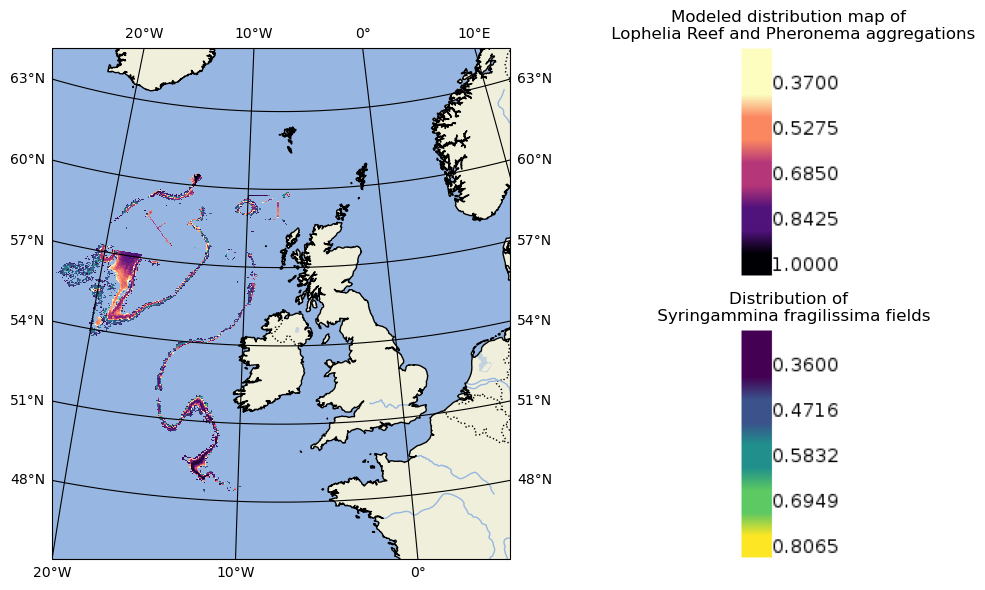

In [19]:
#Import necessary libraries, Cartopy allows for more complex geospatial data rendering, see Cartopy.url for more info
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import requests

#Creating figure and setting the projection
fig = plt.figure(figsize=(12, 6))                                                                        # Increase the figure size
gs = fig.add_gridspec(2, 2, width_ratios=[2, 2])                                                         # Use gridspec to adjust subplot sizes
ax1 = fig.add_subplot(1,2, 1, projection=ccrs.Orthographic(central_longitude=-7.5, central_latitude=55)) # Set custom projection

#Adding features to the map using cartopy
ax1.add_feature(cartopy.feature.OCEAN, )
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax1.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax1.add_feature(cartopy.feature.RIVERS) 
ax1.coastlines(resolution='10m')
ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')

#Setting up map extent
ax1.set_extent([-20,5,45,65])

# access WMS requesting map images in custom projection
ax1.add_wms(wms=wms.url,
           layers=['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode','geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode']) 

###Now set up the legends for both datasets, retrieving them from the wms.styles used above
# Define the legend URLs
legend_urls = [wms['geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode'].styles['geonode:PherCarp_threhsolded_GHO_reprojectedGeoNode']['legend'],
               wms['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode'].styles['geonode:SyrFra_Ens_Cont_Preds_Thresh_200m_GHO_Masked_reprojectedGeoNode']['legend']]  

# Define the directory path where you want to save the images
save_path = "data/"

# Download and save each image
for i, legend_url in enumerate(legend_urls):
    response = requests.get(legend_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        filename = f"legend_image_{i + 1}.png"                                                  # Customize the filename
        with open(save_path + filename, 'wb') as file:
            file.write(response.content)
        print(f"Image {i + 1} saved as {save_path + filename}")
    else:
        print(f"Failed to retrieve Image {i + 1} (Status Code: {response.status_code})")
        

# Add titles to the plot and legends
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the paths to the saved legend images
legend_image_paths = ["data/legend_image_1.png", "data/legend_image_2.png"]

# Define the titles for the plot and legends
legend_titles = ["Modeled distribution map of \n Lophelia Reef and Pheronema aggregations","Distribution of \n Syringammina fragilissima fields"]
legend1_img = plt.imread(legend_image_paths[0])
legend2_img = plt.imread(legend_image_paths[1])

# Create a subplot for the legends to the right (subplot 2)
ax2 = fig.add_subplot(gs[0, 1], frame_on=False)
ax2.imshow(legend1_img)

# Create a subplot for subplot 4 (taller)
ax4 = fig.add_subplot(gs[1, 1], frame_on=False)
ax4.imshow(legend2_img)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('')
ax2.set_ylabel('')

# Remove tickmarks and labels from subplot 4
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xlabel('')
ax4.set_ylabel('')

# Add titles to subplots 2 and 4
ax2.set_title(legend_titles[0])
ax4.set_title(legend_titles[1])

plt.tight_layout()

plt.show()


### [>> Next: Subset and download data using OGC Web Feature and Coverage Services (WFS/WCS)](./3_subset_and_download_data_with_WFS&WCS.ipynb)

<hr>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>